# Final Assignment

In [5]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

# Q1:Extracting Tesla Stock Data Using yfinance

In [6]:
import yfinance as yf
import pandas as pd

In [7]:
tesla = yf.Ticker("TSLA")

In [8]:

tesla_data = tesla.history(period="max")

# Display the first few rows
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Q2- Extracting Tesla Revenue Data Using Webscraping

In [17]:
!pip install requests beautifulsoup4 pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Define the URL for Tesla's revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# Send a GET request
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
# Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")
# Find the revenue table
tables = soup.find_all("table")
for table in tables:
    if "Tesla Annual Revenue" in str(table):  # Identify the correct table
        revenue_table = table
        break
# Extract data
data = []
for row in revenue_table.find_all("tr")[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) >= 2:  # Ensure there are at least two columns
        year = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([year, revenue])
# Convert to DataFrame
df = pd.DataFrame(data, columns=["Year", "Revenue"])
df.to_csv("tesla_revenue.csv", index=False)
print("Data saved to tesla_revenue.csv")
print(df)

Data saved to tesla_revenue.csv
    Year  Revenue
0   2024  $97,690
1   2023  $96,773
2   2022  $81,462
3   2021  $53,823
4   2020  $31,536
5   2019  $24,578
6   2018  $21,461
7   2017  $11,759
8   2016   $7,000
9   2015   $4,046
10  2014   $3,198
11  2013   $2,013
12  2012     $413
13  2011     $204
14  2010     $117
15  2009     $112


# Q3- Extracting GameStop Stock Data Using yfinance

In [20]:

gme = yf.Ticker("GME")
tesla_data = tesla.history(period="max")

# Display the first few rows
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Q4 - Extracting GameStop Revenue Data Using Webscraping

In [19]:
!pip install requests beautifulsoup4 pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Define the URL for GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
# Send a GET request with headers
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
# Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")
# Find the revenue table
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "GameStop Annual Revenue" in str(table):  # Identify the correct table
        revenue_table = table
        break
# Extract data if table is found
data = []
if revenue_table:
    for row in revenue_table.find_all("tr")[1:]:  # Skip header row
        cols = row.find_all("td")
        if len(cols) >= 2:  # Ensure at least two columns exist
            year = cols[0].text.strip()
            revenue = cols[1].text.strip()
            data.append([year, revenue])
# Convert to DataFrame
df = pd.DataFrame(data, columns=["Year", "Revenue"])
# Save data to CSV
df.to_csv("gamestop_revenue.csv", index=False)
print("Data saved to gamestop_revenue.csv")
# Display extracted data
print(df)

Data saved to gamestop_revenue.csv
    Year Revenue
0   2024  $5,273
1   2023  $5,927
2   2022  $6,011
3   2021  $5,090
4   2020  $6,466
5   2019  $8,285
6   2018  $8,547
7   2017  $7,965
8   2016  $9,364
9   2015  $9,296
10  2014  $9,040
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


# Q5 - Tesla Stock and Revenue Dashboard

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_629/1673663402.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_df, x="Year", y="Revenue", palette="Blues_r")


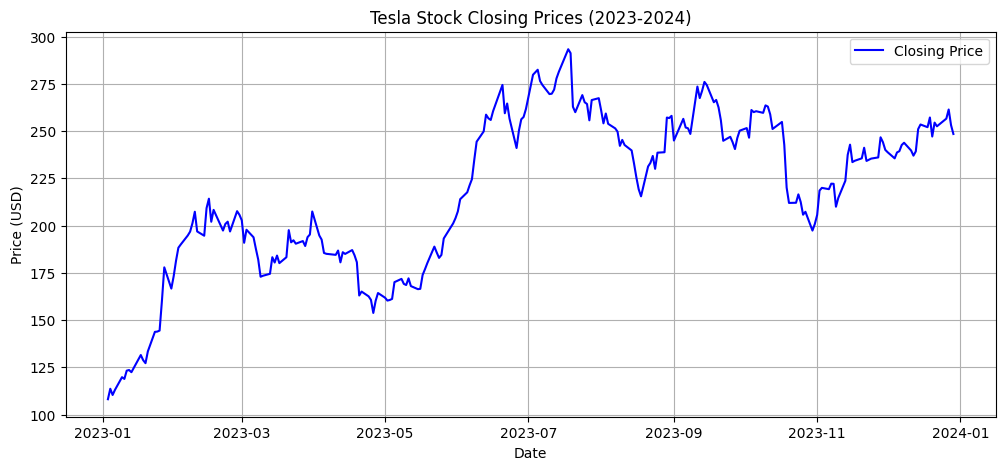

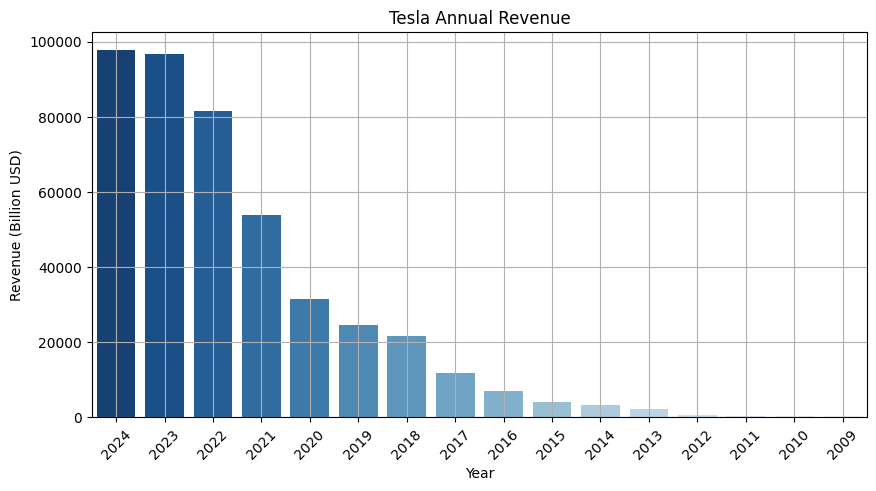

In [26]:
!pip install seaborn
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#  Fetch Tesla Stock Data
ticker = "TSLA"
tesla_data = yf.download(ticker, start="2023-01-01", end="2024-01-01")
#  Scrape Tesla Revenue Data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
# Find revenue table
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Tesla Annual Revenue" in str(table):  
        revenue_table = table
        break
# Extract revenue data
revenue_data = []
if revenue_table:
    for row in revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) >= 2:
            year = cols[0].text.strip()
            revenue = cols[1].text.strip()
            revenue_data.append([year, revenue])
# Convert to DataFrame
revenue_df = pd.DataFrame(revenue_data, columns=["Year", "Revenue"])
revenue_df["Revenue"] = revenue_df["Revenue"].str.replace(r'[^0-9.]', '', regex=True).astype(float)
#  Plot Tesla Stock Closing Prices
plt.figure(figsize=(12, 5))
sns.lineplot(x=tesla_data.index, y=tesla_data["Close"].values.flatten(), label="Closing Price", color="blue")
plt.title("Tesla Stock Closing Prices (2023-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
#  Plot Tesla Annual Revenue
plt.figure(figsize=(10, 5))
sns.barplot(data=revenue_df, x="Year", y="Revenue", palette="Blues_r")
plt.title("Tesla Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue (Billion USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Q6 - GameStop Stock and Revenue Dashboard

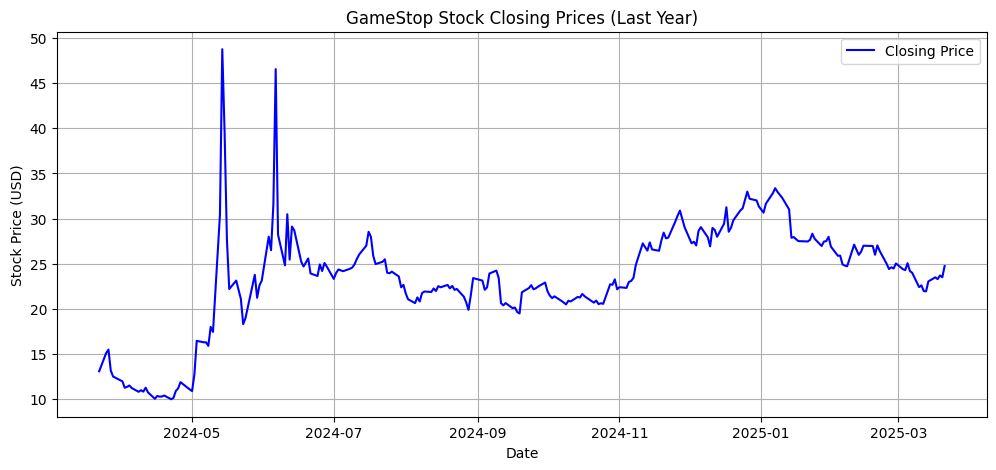

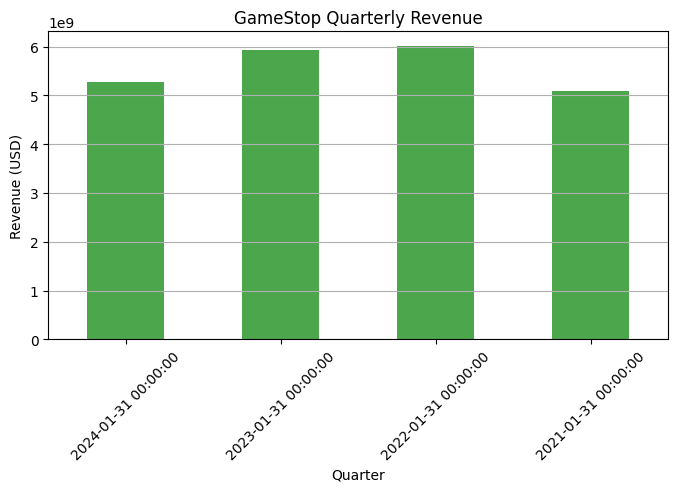

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download GameStop (GME) stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")  # Last 1 year of data

# Fetch revenue data (if available)
gme_financials = gme.financials
gme_revenue = gme.financials.loc["Total Revenue"]

# Plot GameStop Stock Closing Prices
plt.figure(figsize=(12, 5))
sns.lineplot(x=gme_data.index, y=gme_data["Close"], label="Closing Price", color="blue")
plt.title("GameStop Stock Closing Prices (Last Year)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()

# Plot GameStop Revenue (Bar Chart)
plt.figure(figsize=(8, 4))
gme_revenue.dropna().plot(kind="bar", color="green", alpha=0.7)
plt.title("GameStop Quarterly Revenue")
plt.xlabel("Quarter")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()